[*********************100%***********************]  1 of 1 completed

Data Shape: (1361, 1)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 28, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 14, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 12, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          49,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,241 (290.00 KB)

 Trainable params: 74,241 (290.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0171 - val_loss: 0.0030
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - val_loss: 0.0032
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 - val_loss: 0.0018
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - val_loss: 9.3761e-04
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - val_loss: 0.0013


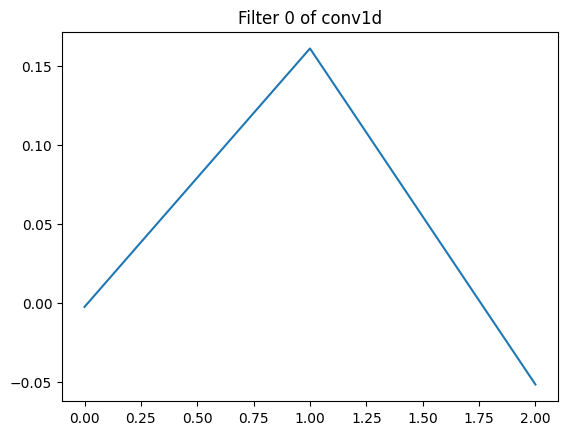

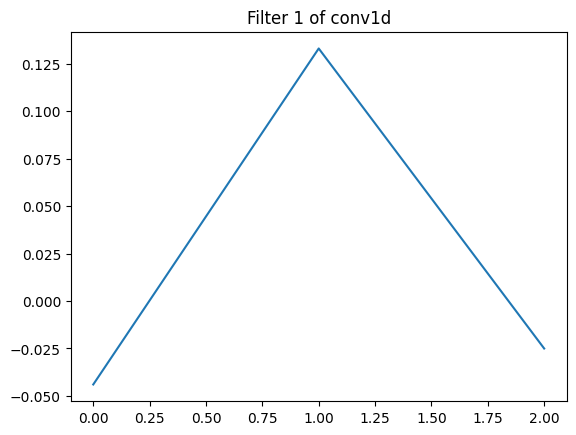

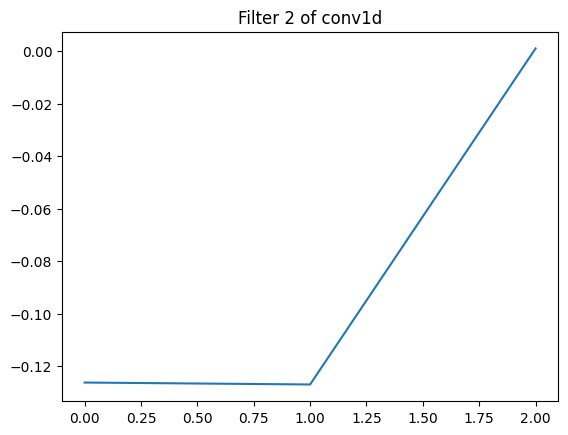

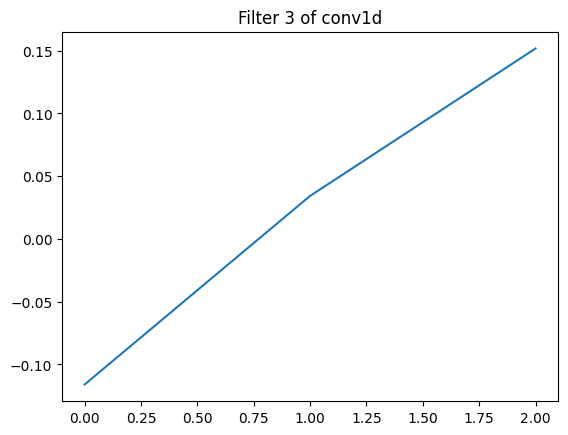

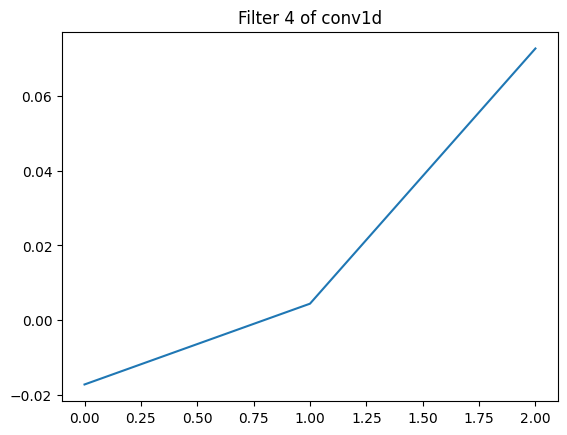

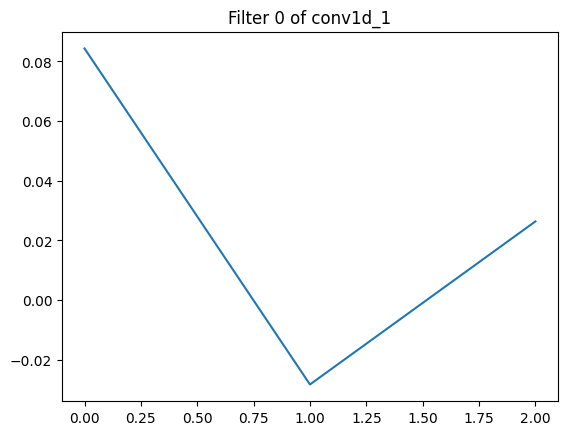

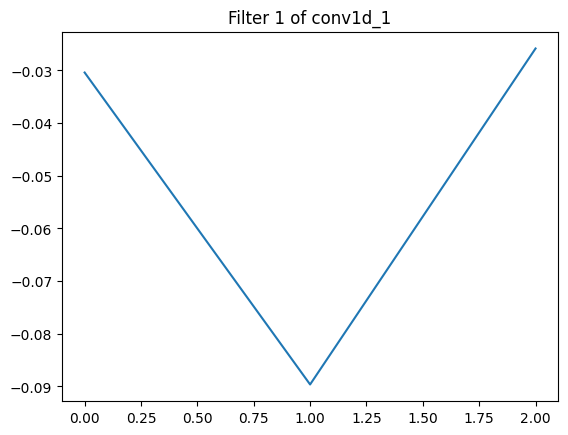

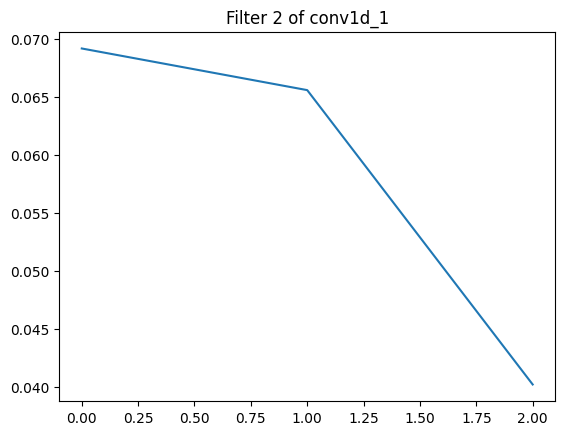

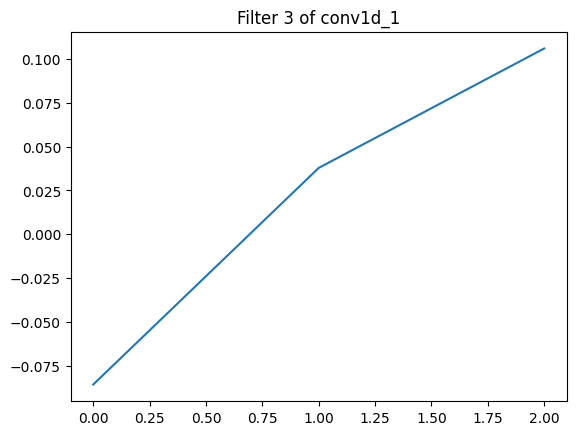

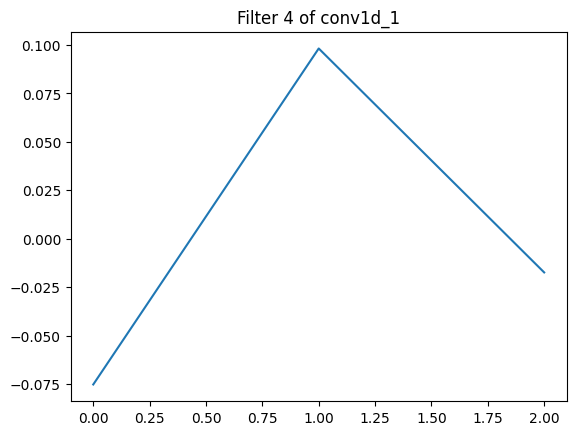

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


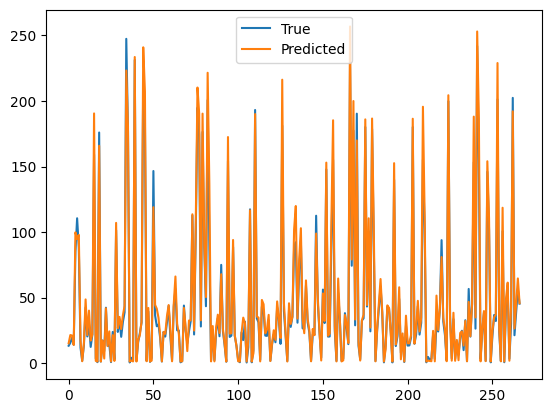

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1: Download SOL-USD Data
def get_data(ticker='SOL-USD', start='2020-01-01', end='2024-01-01'):
    data = yf.download(ticker, start=start, end=end)
    data = data[['Close']]
    return data

# Step 2: Preprocess the data
def preprocess_data(data, window_size=30):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(window_size, len(scaled_data)):
        X.append(scaled_data[i-window_size:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    X = np.expand_dims(X, axis=2)  # Add channel dimension
    return X, y, scaler

# Step 3: Build the CNN model
def build_cnn(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Regression output
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Step 4: Visualize patterns from the convolutional filters
def visualize_filters(model):
    for layer in model.layers:
        if 'conv' in layer.name:
            filters, biases = layer.get_weights()
            n_filters = filters.shape[-1]
            for i in range(min(5, n_filters)):  # Show first 5 filters
                plt.plot(filters[:, 0, i])
                plt.title(f"Filter {i} of {layer.name}")
                plt.show()

# Step 5: Main execution
if __name__ == '__main__':
    # Fetch data
    data = get_data()
    print(f"Data Shape: {data.shape}")

    # Prepare data
    X, y, scaler = preprocess_data(data.values)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build and train model
    model = build_cnn(input_shape=(X_train.shape[1], 1))
    model.summary()
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Visualize filters
    visualize_filters(model)

    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plot results
    plt.plot(y_test_rescaled, label='True')
    plt.plot(predictions, label='Predicted')
    plt.legend()
    plt.show()


[*********************100%***********************]  1 of 1 completed

Data Shape: (7464, 1)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 46, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 23, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 21, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          81,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107,009 (418.00 KB)

 Trainable params: 107,009 (418.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0134 - val_loss: 8.4223e-04
Epoch 2/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0030 - val_loss: 5.2979e-04
Epoch 3/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 4/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0022 - val_loss: 3.6479e-04
Epoch 5/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 6/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0019 - val_loss: 4.1137e-04
Epoch 7/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0015 - val_loss: 3.1429e-04
Epoch 8/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0013 - val_loss: 2.9122e-04
Epoch 9/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0012 - val_loss: 3.0304e-04
Epoch 10/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0011 - val_loss: 9.1781e-04


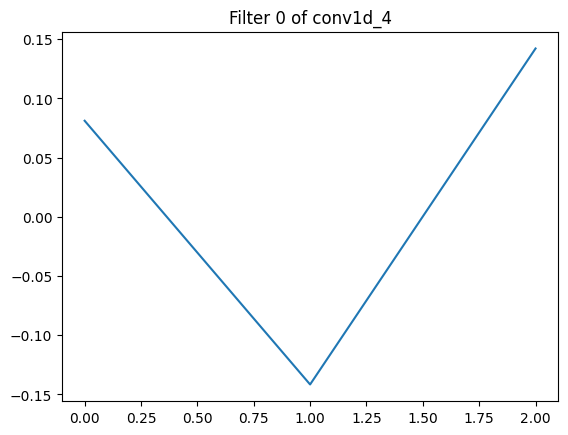

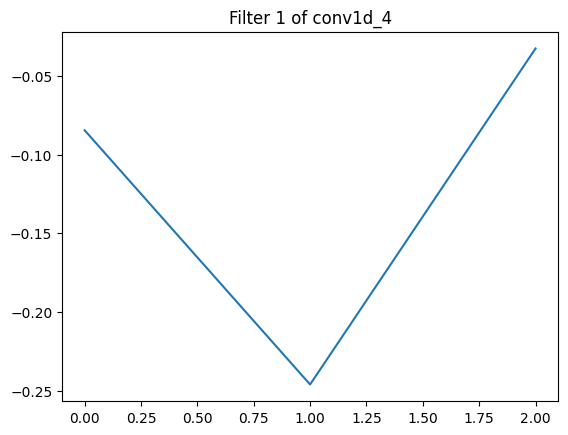

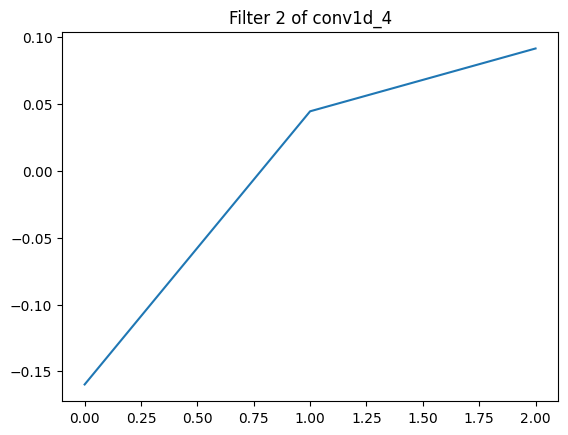

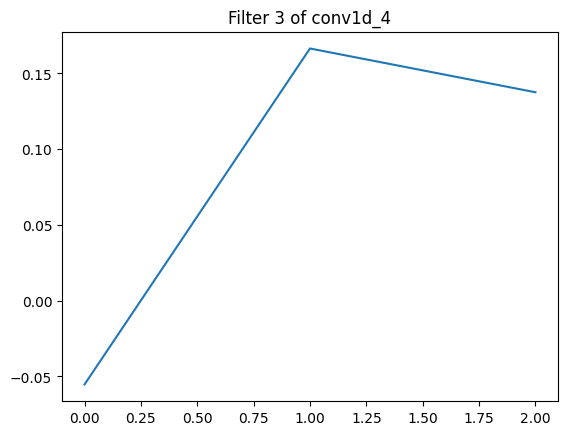

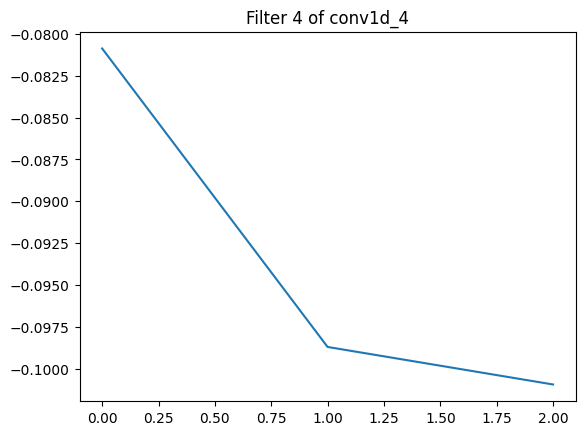

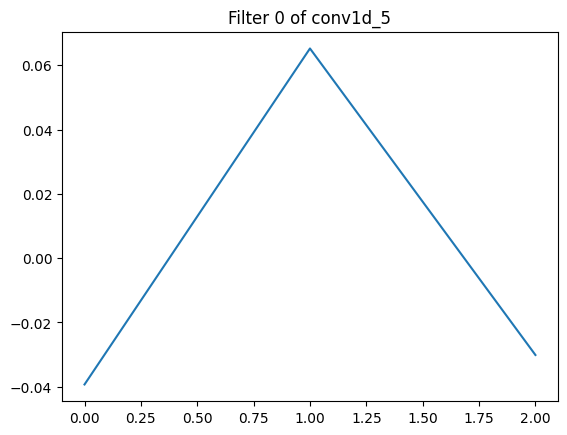

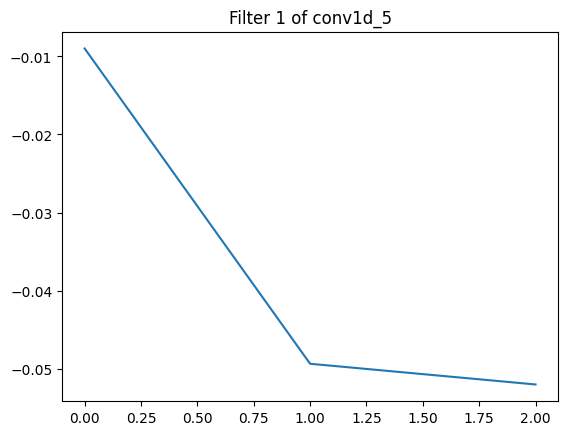

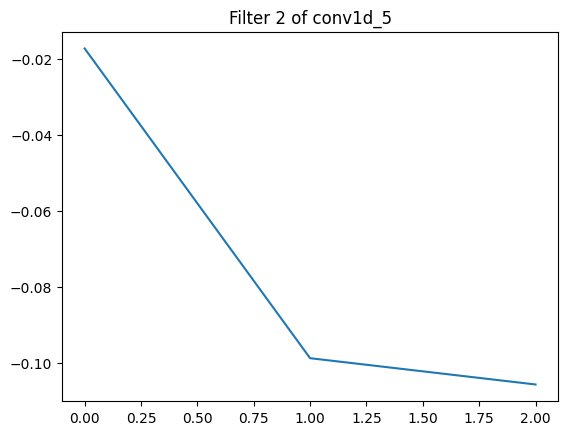

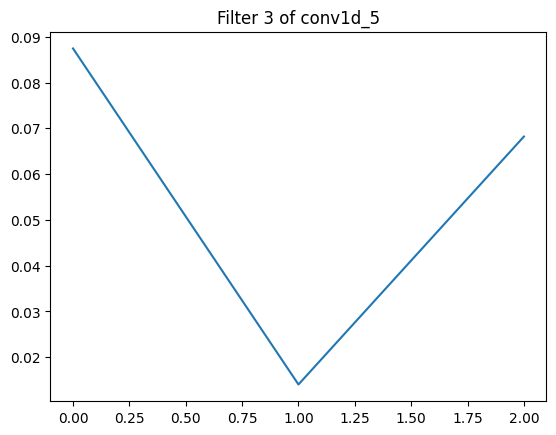

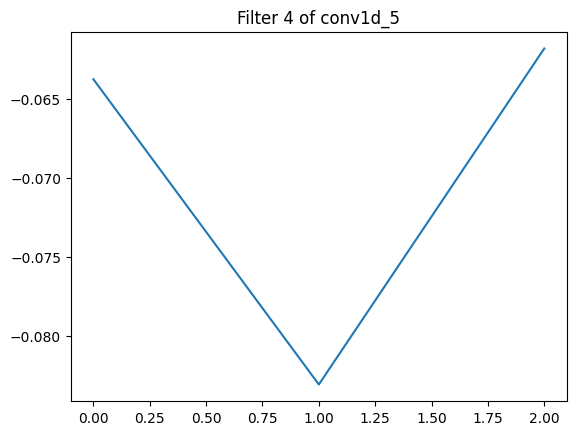

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

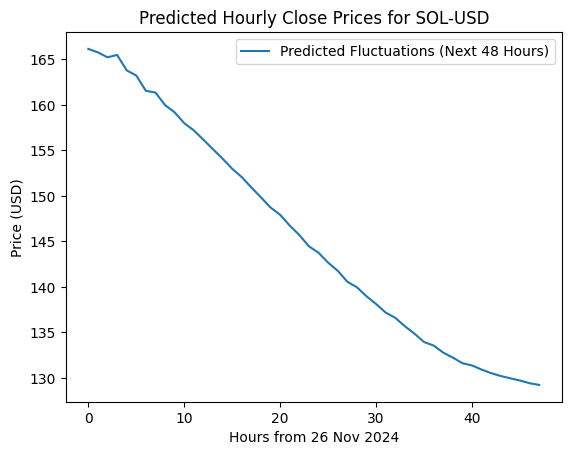

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1: Download SOL-USD Hourly Data
def get_hourly_data(ticker='SOL-USD', start='2024-01-20', end='2024-11-26'):
    data = yf.download(ticker, interval='1h', start=start, end=end)
    data = data[['Close']]
    return data

# Step 2: Preprocess the data for hourly predictions
def preprocess_data(data, window_size=48):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(window_size, len(scaled_data)):
        X.append(scaled_data[i-window_size:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    X = np.expand_dims(X, axis=2)  # Add channel dimension
    return X, y, scaler

# Step 3: Build the CNN model
def build_cnn(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Regression output
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Step 4: Visualize patterns from the convolutional filters
def visualize_filters(model):
    for layer in model.layers:
        if 'conv' in layer.name:
            filters, biases = layer.get_weights()
            n_filters = filters.shape[-1]
            for i in range(min(5, n_filters)):  # Show first 5 filters
                plt.plot(filters[:, 0, i])
                plt.title(f"Filter {i} of {layer.name}")
                plt.show()

# Step 5: Predict future values
def predict_future(model, recent_data, scaler, steps=48):
    predictions = []
    input_sequence = recent_data[-48:]  # Start with the last known window

    for _ in range(steps):
        pred = model.predict(input_sequence[np.newaxis, :, :])
        predictions.append(pred[0, 0])
        # Update the input sequence with the new prediction
        input_sequence = np.append(input_sequence[1:], pred, axis=0)

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions

# Step 6: Main execution
if __name__ == '__main__':
    # Fetch data
    data = get_hourly_data()
    print(f"Data Shape: {data.shape}")

    # Prepare data
    X, y, scaler = preprocess_data(data.values)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build and train model
    model = build_cnn(input_shape=(X_train.shape[1], 1))
    model.summary()
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Visualize filters
    visualize_filters(model)

    # Predict for the next 48 hours
    recent_data = X_test[-1]  # Use the last available test sequence
    predictions = predict_future(model, recent_data, scaler, steps=48)

    # Plot the results
    plt.plot(predictions, label='Predicted Fluctuations (Next 48 Hours)')
    plt.title('Predicted Hourly Close Prices for SOL-USD')
    plt.xlabel('Hours from 26 Nov 2024')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()


[*********************100%***********************]  1 of 1 completed

Data Shape: (144, 1)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 48, 128)             │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 24, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 24, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 12, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 12, 512)             │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 512)             │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 6, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,316,353 (5.02 MB)

 Trainable params: 1,314,561 (5.01 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 324ms/step - loss: 3.7423 - mae: 1.3998 - val_loss: 0.5076 - val_mae: 0.6919
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 3.2141 - mae: 1.4057 - val_loss: 0.4915 - val_mae: 0.6773
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 4.0749 - mae: 1.5601 - val_loss: 0.5160 - val_mae: 0.6938
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 2.0789 - mae: 1.1161 - val_loss: 0.4900 - val_mae: 0.6730
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 2.4725 - mae: 1.1402 - val_loss: 0.4441 - val_mae: 0.6352
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 1.6643 - mae: 0.9144 - val_loss: 0.4161 - val_mae: 0.6113
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.2502 - mae: 0.8532 - val_loss: 0.3831 - val_mae: 0.5828
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 2.8823 - mae: 1.2522 - val_loss: 0.3494 - val_mae: 0.5574
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 1.5860 - mae: 0.9498 -

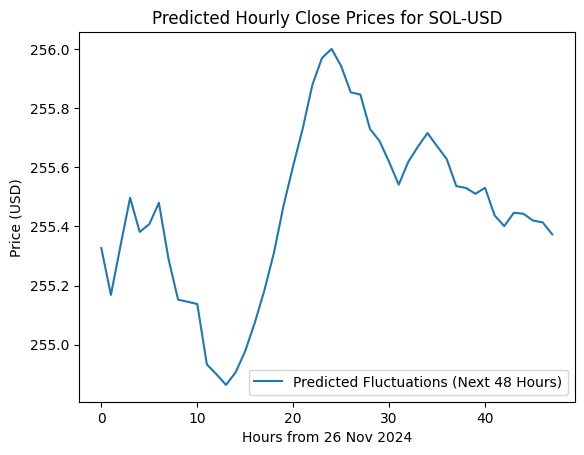

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1: Download SOL-USD Hourly Data
def get_hourly_data(ticker='SOL-USD', start='2024-11-20', end='2024-11-26'):
    data = yf.download(ticker, interval='1h', start=start, end=end)
    data = data[['Close']]
    return data

# Step 2: Preprocess the data for hourly predictions
def preprocess_data(data, window_size=48):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(window_size, len(scaled_data)):
        X.append(scaled_data[i-window_size:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    X = np.expand_dims(X, axis=2)  # Add channel dimension
    return X, y, scaler

# Step 3: Build a more complex CNN model
def build_complex_cnn(input_shape):
    model = Sequential([
        # First convolutional block
        Conv1D(filters=128, kernel_size=5, activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Second convolutional block
        Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Third convolutional block
        Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Fully connected layers
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1)  # Regression output
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Step 4: Predict future values
def predict_future(model, recent_data, scaler, steps=48):
    predictions = []
    input_sequence = recent_data[-48:]  # Start with the last known window

    for _ in range(steps):
        pred = model.predict(input_sequence[np.newaxis, :, :])
        predictions.append(pred[0, 0])
        # Update the input sequence with the new prediction
        input_sequence = np.append(input_sequence[1:], pred, axis=0)

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions

# Step 5: Main execution
if __name__ == '__main__':
    # Fetch data
    data = get_hourly_data()
    print(f"Data Shape: {data.shape}")

    # Prepare data
    X, y, scaler = preprocess_data(data.values)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build and train a more complex model
    model = build_complex_cnn(input_shape=(X_train.shape[1], 1))
    model.summary()
    model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

    # Predict for the next 48 hours
    recent_data = X_test[-1]  # Use the last available test sequence
    predictions = predict_future(model, recent_data, scaler, steps=48)

    # Plot the results
    plt.plot(predictions, label='Predicted Fluctuations (Next 48 Hours)')
    plt.title('Predicted Hourly Close Prices for SOL-USD')
    plt.xlabel('Hours from 26 Nov 2024')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()


[*********************100%***********************]  1 of 1 completed

Data Shape: (7464, 1)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1 (Conv1D)                       │ (None, 48, 128)             │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 48, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 24, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv1D)                       │ (None, 24, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 24, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 12, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3 (Conv1D)                       │ (None, 12, 512)             │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 512)             │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 6, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,316,353 (5.02 MB)

 Trainable params: 1,314,561 (5.01 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 16s 134ms/step - loss: 6.4795 - mae: 1.3282 - val_loss: 0.1240 - val_mae: 0.3120
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - loss: 0.1270 - mae: 0.2433 - val_loss: 0.2406 - val_mae: 0.4542
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - loss: 0.0272 - mae: 0.1236 - val_loss: 0.3572 - val_mae: 0.5601
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 143ms/step - loss: 0.0203 - mae: 0.1066 - val_loss: 0.2993 - val_mae: 0.5333
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 139ms/step - loss: 0.0142 - mae: 0.0864 - val_loss: 0.1858 - val_mae: 0.4119
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 137ms/step - loss: 0.0142 - mae: 0.0844 - val_loss: 0.0361 - val_mae: 0.1541
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 138ms/step - loss: 0.0117 - mae: 0.0771 - val_loss: 0.0219 - val_mae: 0.1129
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - loss: 0.0108 - mae: 0.0733 - val_loss: 0.0236 - val_mae: 0.1306
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/

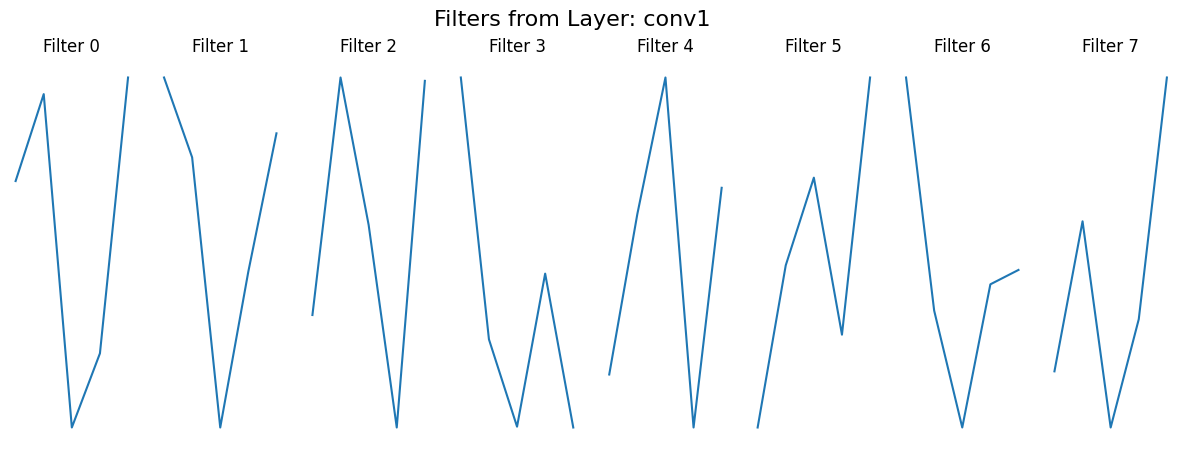

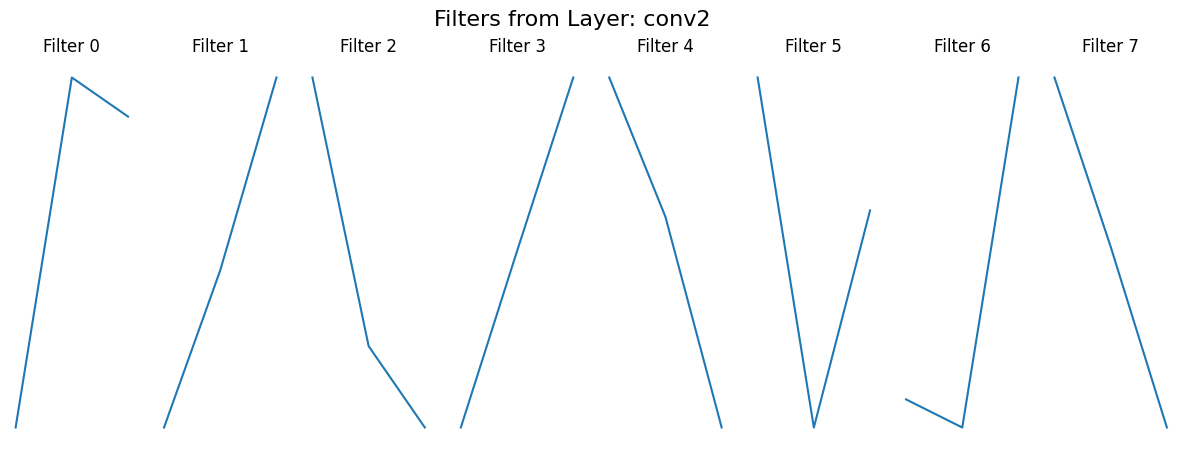

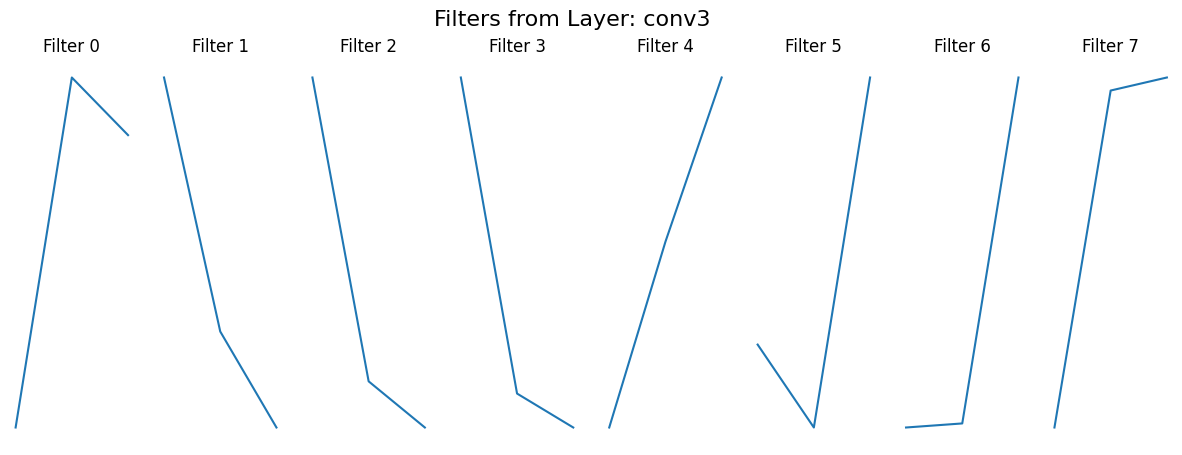

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━

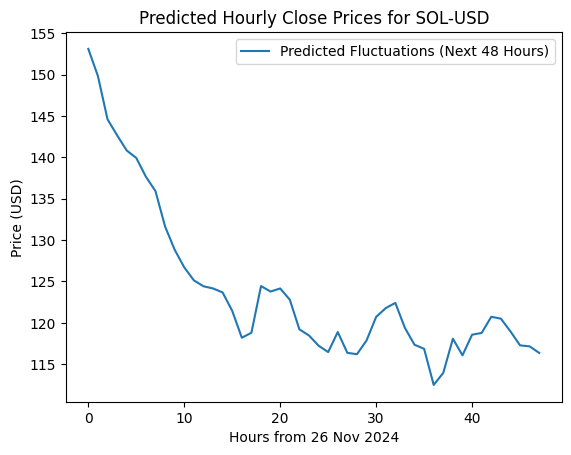

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1: Download SOL-USD Hourly Data
def get_hourly_data(ticker='SOL-USD', start='2024-01-20', end='2024-11-26'):
    data = yf.download(ticker, interval='1h', start=start, end=end)
    data = data[['Close']]
    return data

# Step 2: Preprocess the data for hourly predictions
def preprocess_data(data, window_size=48):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(window_size, len(scaled_data)):
        X.append(scaled_data[i-window_size:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    X = np.expand_dims(X, axis=2)  # Add channel dimension
    return X, y, scaler

# Step 3: Build a more complex CNN model
def build_complex_cnn(input_shape):
    model = Sequential([
        # First convolutional block
        Conv1D(filters=128, kernel_size=5, activation='relu', padding='same', input_shape=input_shape, name='conv1'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Second convolutional block
        Conv1D(filters=256, kernel_size=3, activation='relu', padding='same', name='conv2'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Third convolutional block
        Conv1D(filters=512, kernel_size=3, activation='relu', padding='same', name='conv3'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Fully connected layers
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1)  # Regression output
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Step 4: Visualize filters
def visualize_filters(model):
    for layer in model.layers:
        if isinstance(layer, Conv1D):
            filters, biases = layer.get_weights()
            num_filters = filters.shape[-1]
            plt.figure(figsize=(15, 5))
            for i in range(min(8, num_filters)):  # Show up to 8 filters
                plt.subplot(1, 8, i + 1)
                plt.plot(filters[:, 0, i])
                plt.title(f'Filter {i}')
                plt.axis('off')
            plt.suptitle(f"Filters from Layer: {layer.name}", fontsize=16)
            plt.show()

# Step 5: Predict future values
def predict_future(model, recent_data, scaler, steps=48):
    predictions = []
    input_sequence = recent_data[-48:]  # Start with the last known window

    for _ in range(steps):
        pred = model.predict(input_sequence[np.newaxis, :, :])
        predictions.append(pred[0, 0])
        # Update the input sequence with the new prediction
        input_sequence = np.append(input_sequence[1:], pred, axis=0)

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions

# Step 6: Main execution
if __name__ == '__main__':
    # Fetch data
    data = get_hourly_data()
    print(f"Data Shape: {data.shape}")

    # Prepare data
    X, y, scaler = preprocess_data(data.values)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build and train a more complex model
    model = build_complex_cnn(input_shape=(X_train.shape[1], 1))
    model.summary()
    model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

    # Visualize filters
    visualize_filters(model)

    # Predict for the next 48 hours
    recent_data = X_test[-1]  # Use the last available test sequence
    predictions = predict_future(model, recent_data, scaler, steps=48)

    # Plot the results
    plt.plot(predictions, label='Predicted Fluctuations (Next 48 Hours)')
    plt.title('Predicted Hourly Close Prices for SOL-USD')
    plt.xlabel('Hours from 26 Nov 2024')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()


[*********************100%***********************]  1 of 1 completed

Data Shape: (7464, 1)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1 (Conv1D)                       │ (None, 48, 128)             │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 48, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 24, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv1D)                       │ (None, 24, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 24, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_12 (MaxPooling1D)      │ (None, 12, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3 (Conv1D)                       │ (None, 12, 512)             │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 12, 512)             │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ (None, 6, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,316,353 (5.02 MB)

 Trainable params: 1,314,561 (5.01 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 16s 139ms/step - loss: 3.3047 - mae: 0.9767 - val_loss: 0.1683 - val_mae: 0.3588
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - loss: 0.0786 - mae: 0.1924 - val_loss: 0.9339 - val_mae: 0.8985
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - loss: 0.0251 - mae: 0.1129 - val_loss: 1.3015 - val_mae: 1.0470
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - loss: 0.0132 - mae: 0.0856 - val_loss: 1.4363 - val_mae: 1.0442
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - loss: 0.0125 - mae: 0.0791 - val_loss: 0.5596 - val_mae: 0.6043
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 142ms/step - loss: 0.0133 - mae: 0.0816 - val_loss: 0.1116 - val_mae: 0.2591
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - loss: 0.0091 - mae: 0.0689 - val_loss: 0.0202 - val_mae: 0.1229
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - loss: 0.0089 - mae: 0.0668 - val_loss: 0.0218 - val_mae: 0.1227
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/

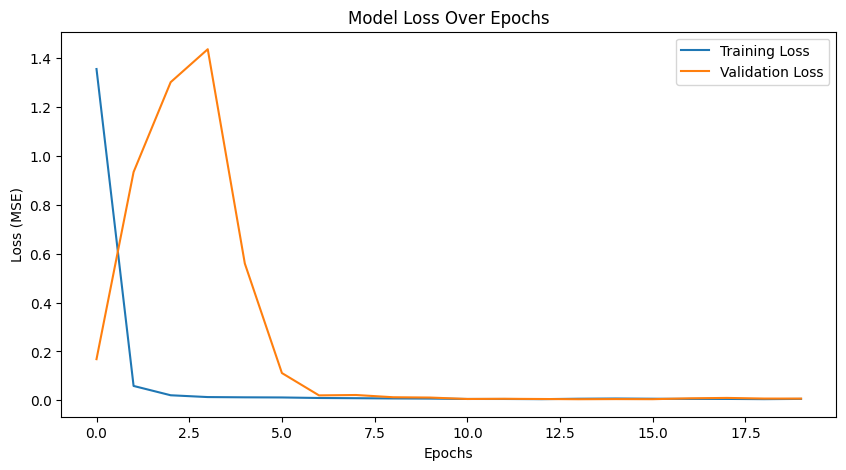

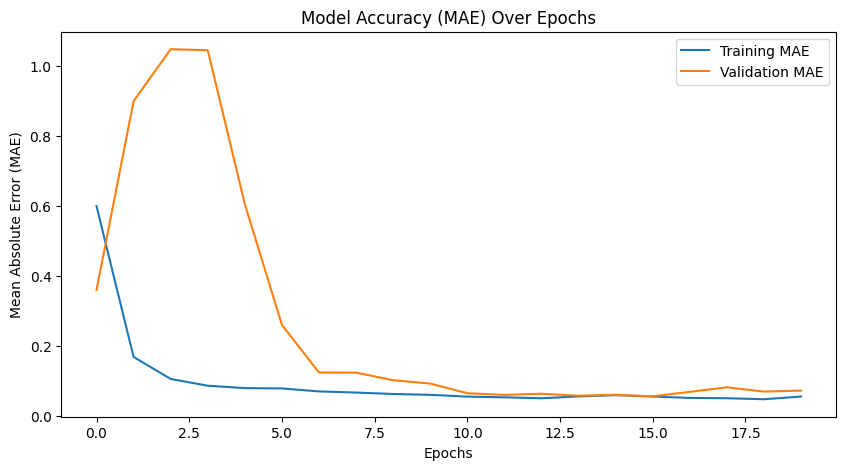

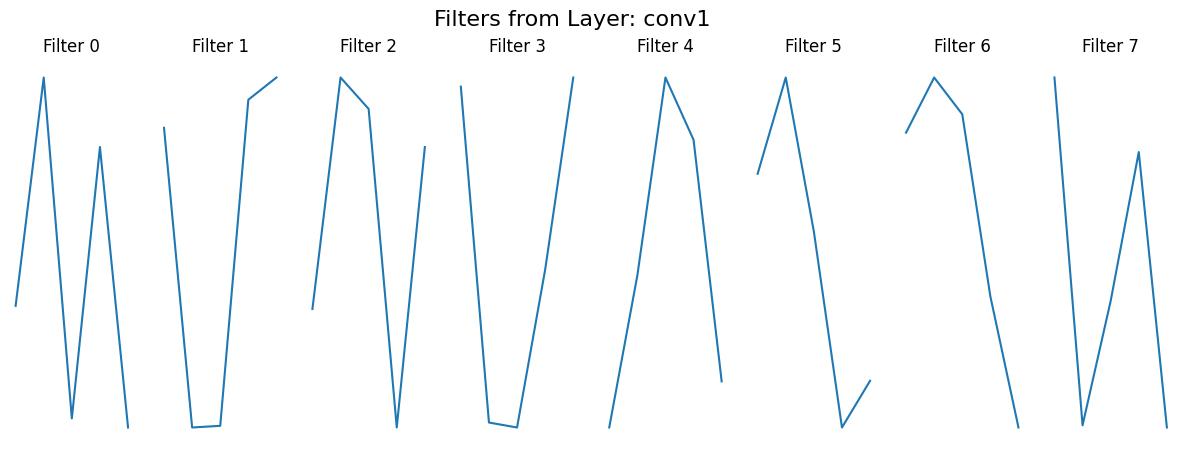

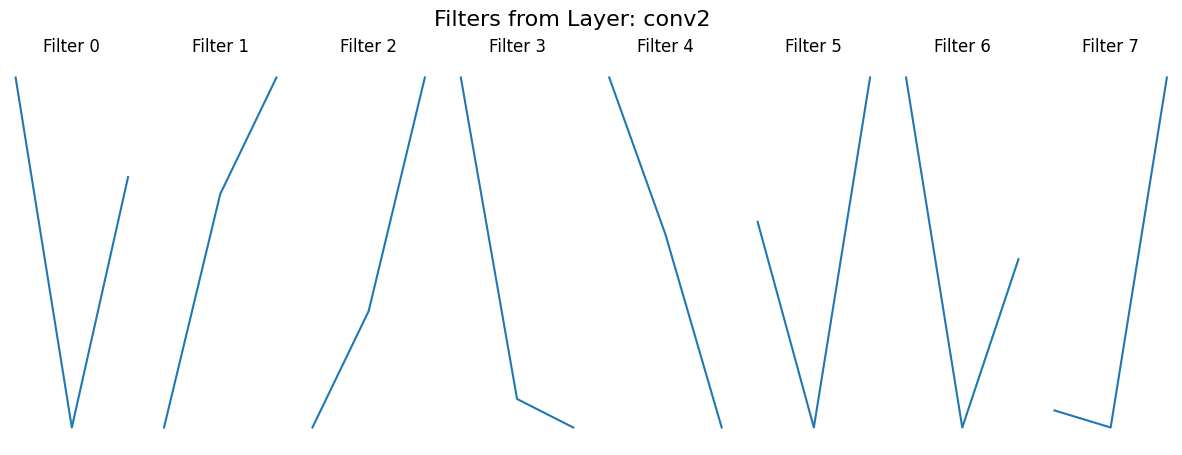

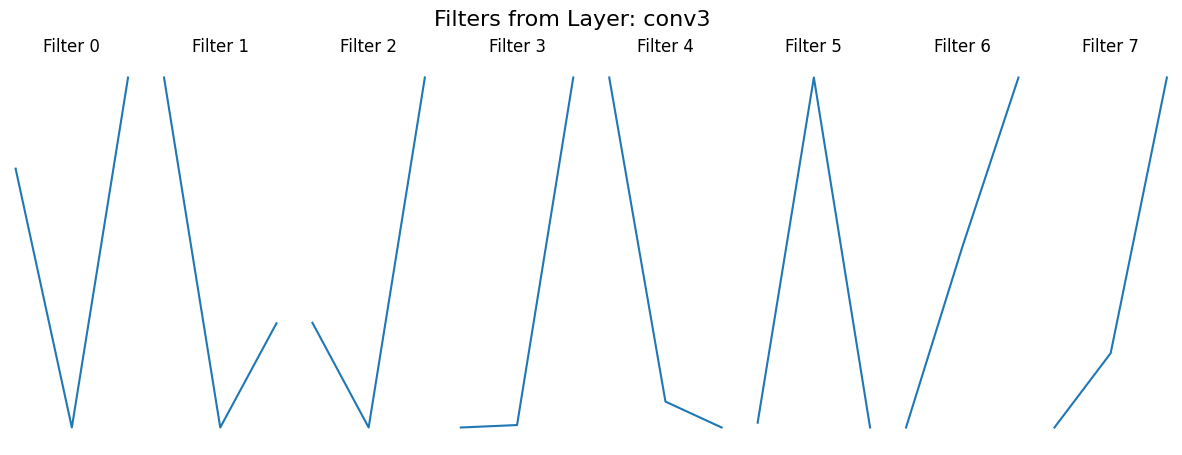

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

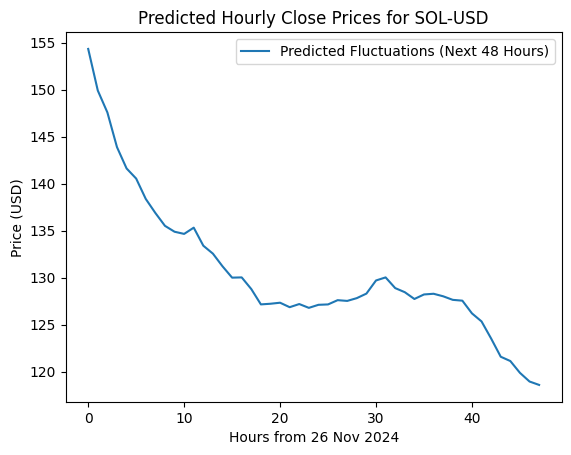

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1: Download SOL-USD Hourly Data
def get_hourly_data(ticker='SOL-USD', start='2024-01-20', end='2024-11-26'):
    data = yf.download(ticker, interval='1h', start=start, end=end)
    data = data[['Close']]
    return data

# Step 2: Preprocess the data for hourly predictions
def preprocess_data(data, window_size=48):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(window_size, len(scaled_data)):
        X.append(scaled_data[i-window_size:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    X = np.expand_dims(X, axis=2)  # Add channel dimension
    return X, y, scaler

# Step 3: Build a more complex CNN model
def build_complex_cnn(input_shape):
    model = Sequential([
        # First convolutional block
        Conv1D(filters=128, kernel_size=5, activation='relu', padding='same', input_shape=input_shape, name='conv1'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Second convolutional block
        Conv1D(filters=256, kernel_size=3, activation='relu', padding='same', name='conv2'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Third convolutional block
        Conv1D(filters=512, kernel_size=3, activation='relu', padding='same', name='conv3'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Fully connected layers
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1)  # Regression output
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Step 4: Visualize filters
def visualize_filters(model):
    for layer in model.layers:
        if isinstance(layer, Conv1D):
            filters, biases = layer.get_weights()
            num_filters = filters.shape[-1]
            plt.figure(figsize=(15, 5))
            for i in range(min(8, num_filters)):  # Show up to 8 filters
                plt.subplot(1, 8, i + 1)
                plt.plot(filters[:, 0, i])
                plt.title(f'Filter {i}')
                plt.axis('off')
            plt.suptitle(f"Filters from Layer: {layer.name}", fontsize=16)
            plt.show()

# Step 5: Predict future values
def predict_future(model, recent_data, scaler, steps=48):
    predictions = []
    input_sequence = recent_data[-48:]  # Start with the last known window

    for _ in range(steps):
        pred = model.predict(input_sequence[np.newaxis, :, :])
        predictions.append(pred[0, 0])
        # Update the input sequence with the new prediction
        input_sequence = np.append(input_sequence[1:], pred, axis=0)

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions

# Step 6: Plot training accuracy and loss
def plot_training_history(history):
    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.show()

    # Plot MAE
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Model Accuracy (MAE) Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.legend()
    plt.show()

# Step 7: Main execution
if __name__ == '__main__':
    # Fetch data
    data = get_hourly_data()
    print(f"Data Shape: {data.shape}")

    # Prepare data
    X, y, scaler = preprocess_data(data.values)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build and train a more complex model
    model = build_complex_cnn(input_shape=(X_train.shape[1], 1))
    model.summary()
    history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

    # Plot training history
    plot_training_history(history)

    # Visualize filters
    visualize_filters(model)

    # Predict for the next 48 hours
    recent_data = X_test[-1]  # Use the last available test sequence
    predictions = predict_future(model, recent_data, scaler, steps=48)

    # Plot the results
    plt.plot(predictions, label='Predicted Fluctuations (Next 48 Hours)')
    plt.title('Predicted Hourly Close Prices for SOL-USD')
    plt.xlabel('Hours from 26 Nov 2024')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Data Shape: (2352, 1)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 48, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 48, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 48, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 48, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 24, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 24, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 24, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 24, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ (None, 12, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 12, 256)             │         164,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 12, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 12, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 12, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_16 (MaxPooling1D)      │ (None, 6, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 6, 512)              │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 6, 512)              │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 6, 512)              │         786,9

 Total params: 2,341,569 (8.93 MB)

 Trainable params: 2,337,729 (8.92 MB)

 Non-trainable params: 3,840 (15.00 KB)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 507ms/step - loss: 1.0699 - mae: 0.7305 - val_loss: 0.1732 - val_mae: 0.3358
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 490ms/step - loss: 0.1067 - mae: 0.2480 - val_loss: 0.1193 - val_mae: 0.2459
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 494ms/step - loss: 0.0530 - mae: 0.1729 - val_loss: 0.0909 - val_mae: 0.2013
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 489ms/step - loss: 0.0436 - mae: 0.1423 - val_loss: 0.0756 - val_mae: 0.1854
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 490ms/step - loss: 0.0236 - mae: 0.1105 - val_loss: 0.0635 - val_mae: 0.1775
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 499ms/step - loss: 0.0211 - mae: 0.1019 - val_loss: 0.0542 - val_mae: 0.1752
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 493ms/step - loss: 0.0172 - mae: 0.0884 - val_loss: 0.0492 - val_mae: 0.1743
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 494ms/step - loss: 0.0129 - mae: 0.0806 - val_loss: 0.0464 - val_mae: 0.1671
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 496ms/

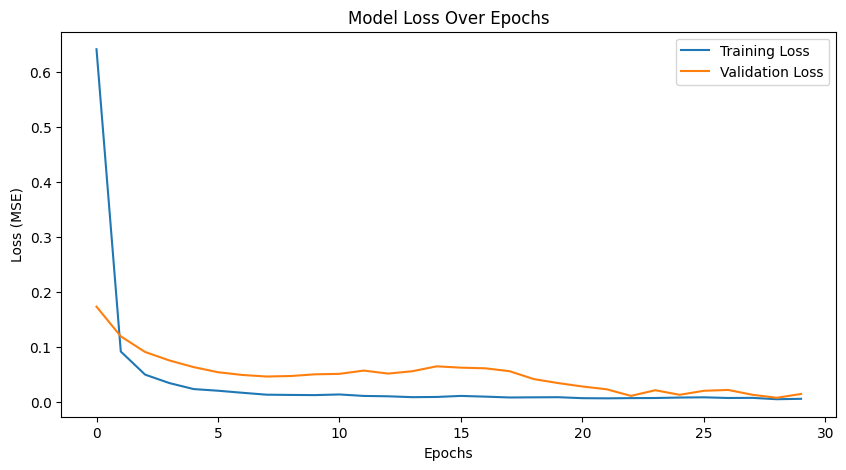

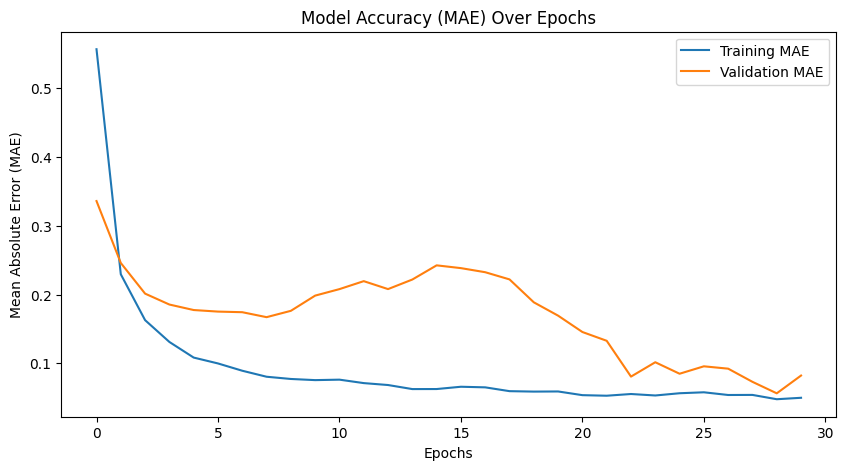

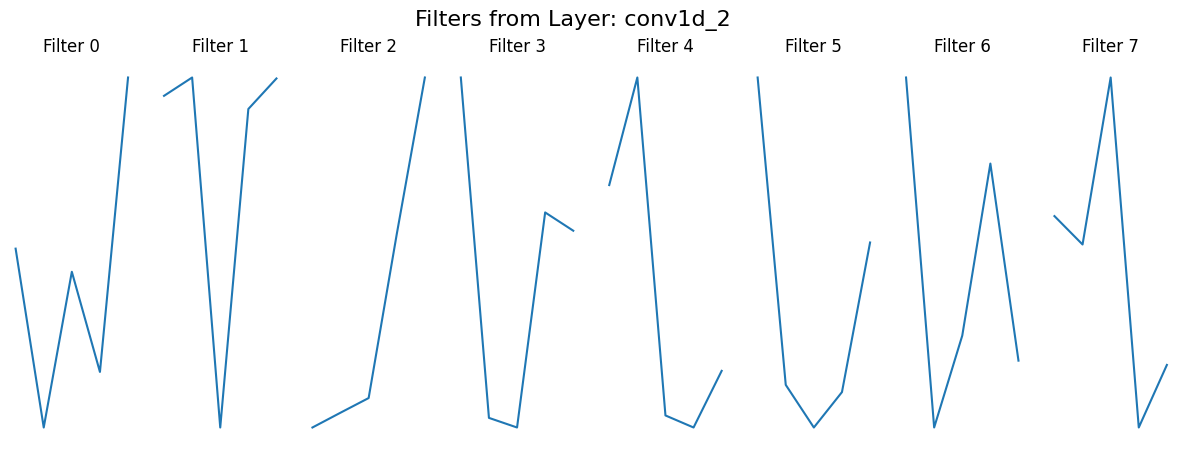

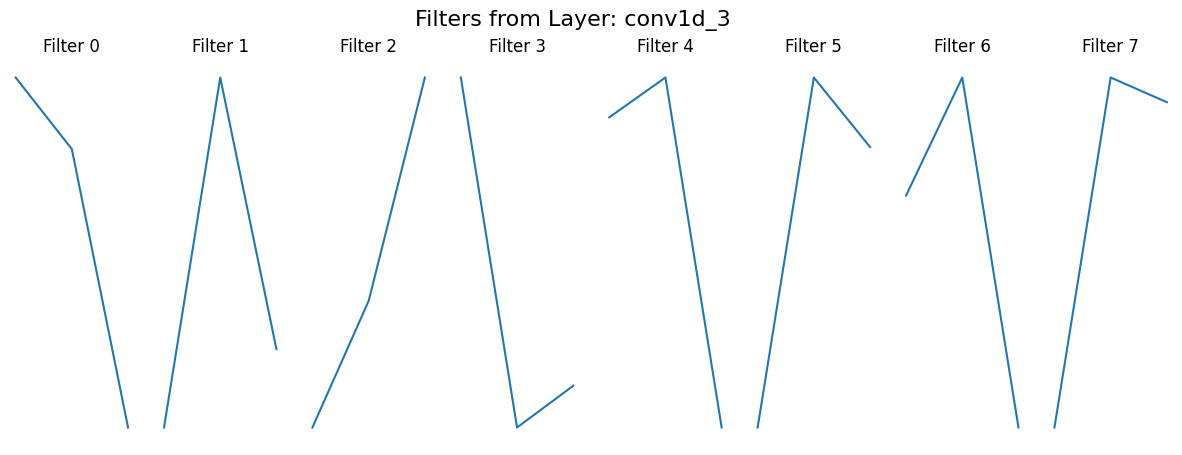

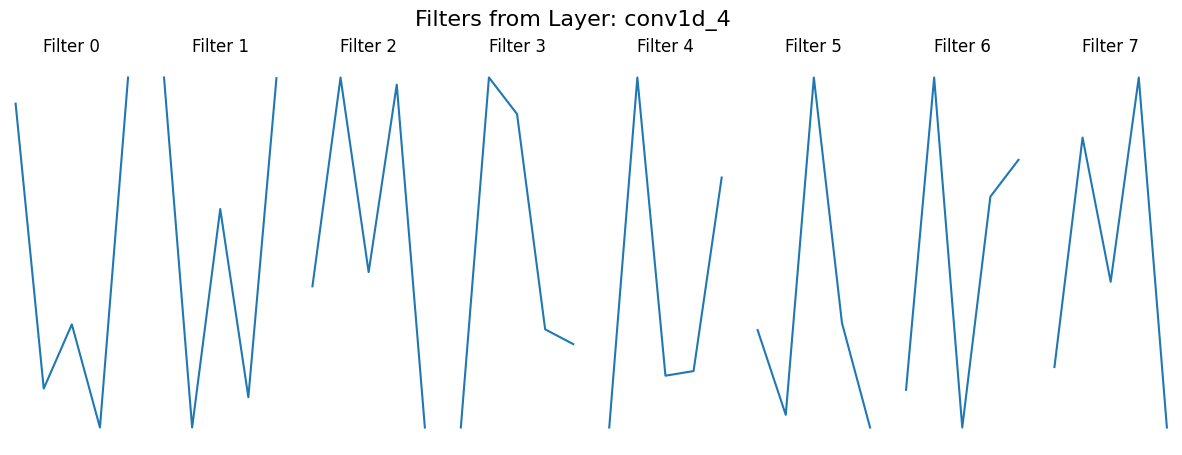

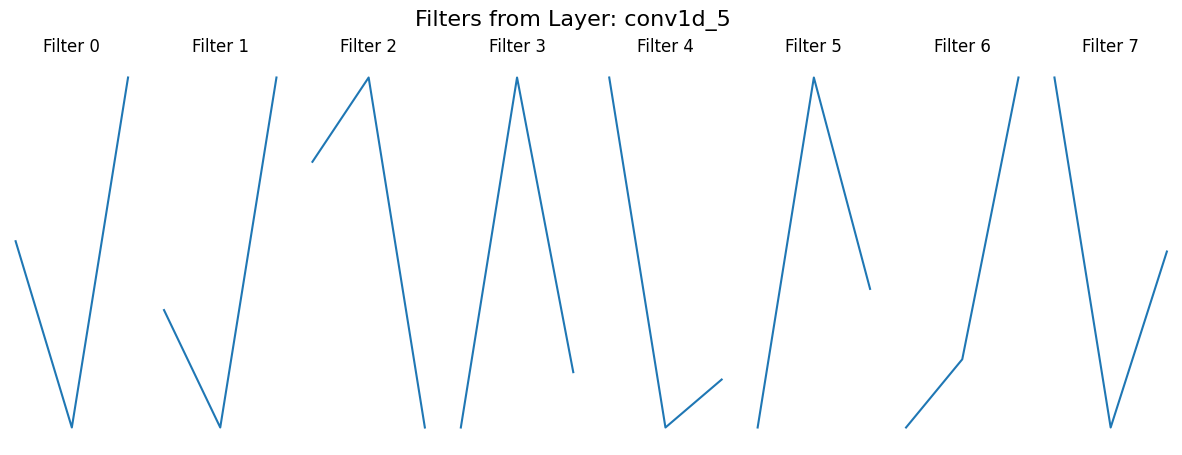

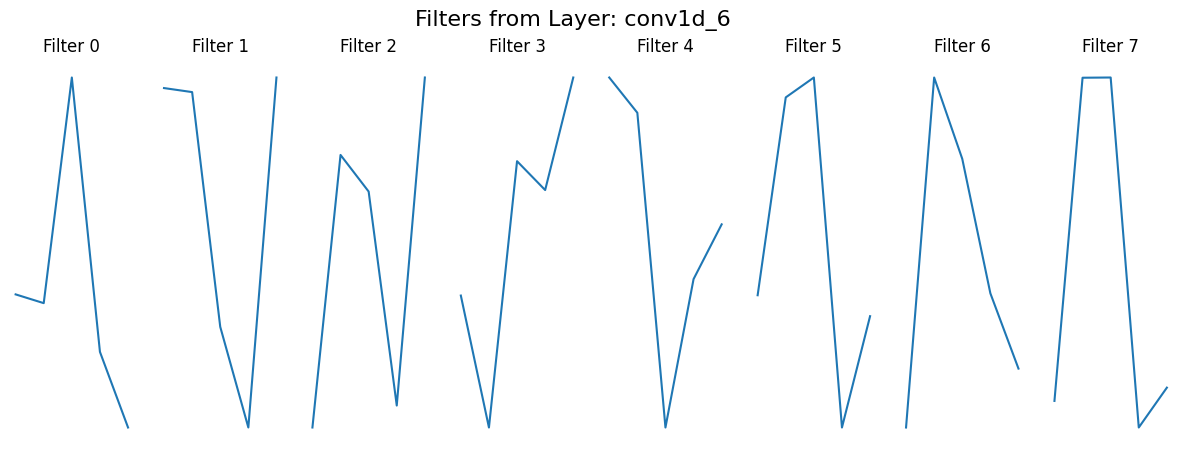

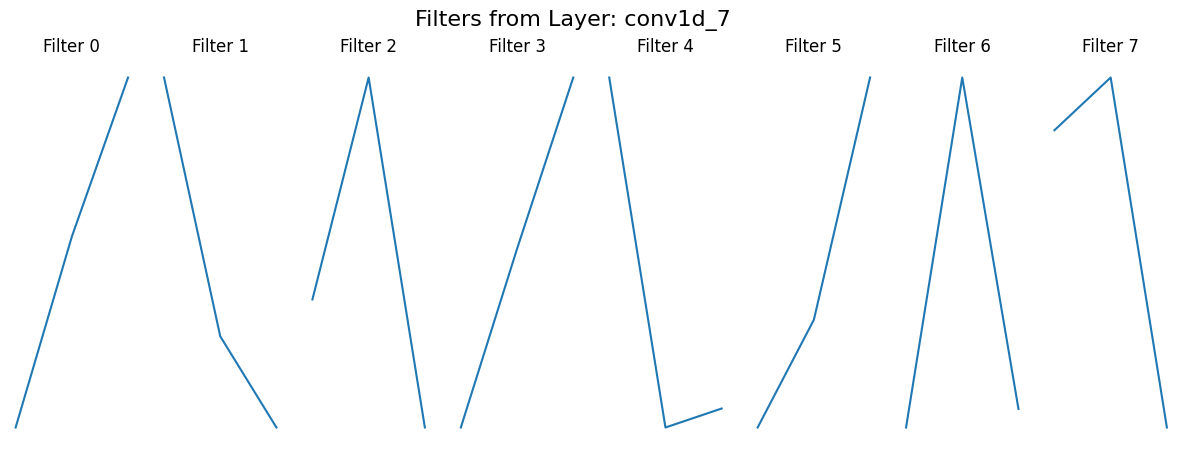

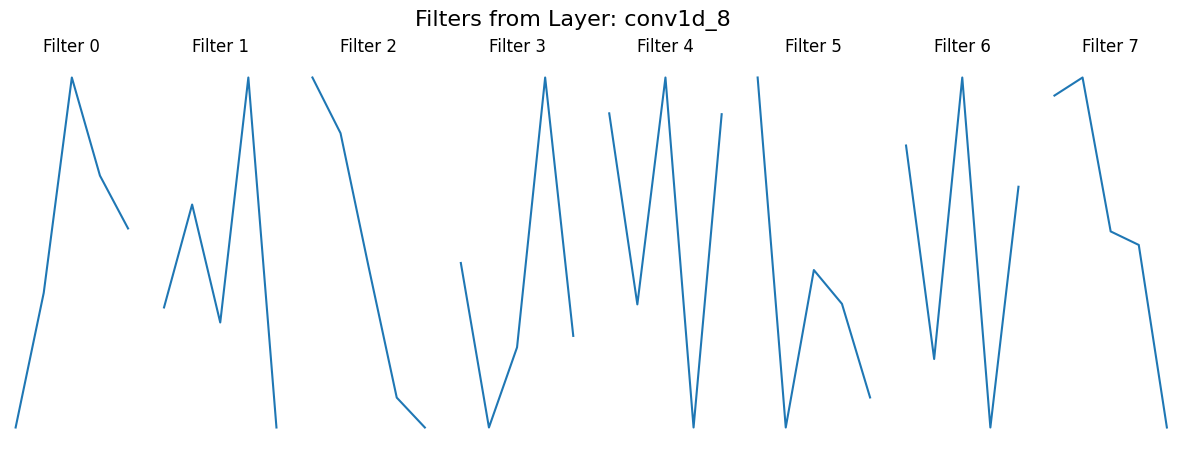

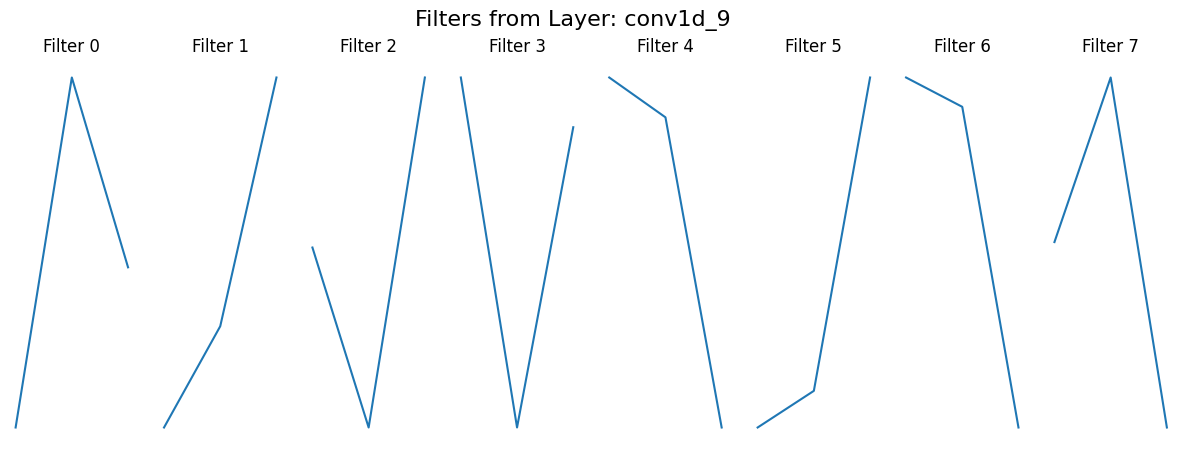

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━

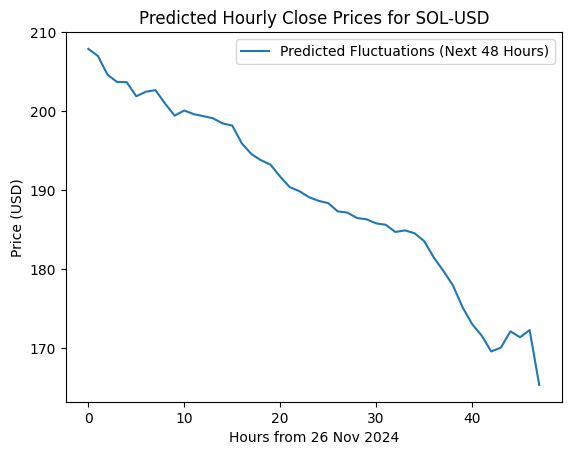

In [6]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1: Download SOL-USD Hourly Data
def get_hourly_data(ticker='SOL-USD', start='2024-08-20', end='2024-11-26'):
    data = yf.download(ticker, interval='1h', start=start, end=end)
    data = data[['Close']]
    return data

# Step 2: Preprocess the data for hourly predictions
def preprocess_data(data, window_size=48):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(window_size, len(scaled_data)):
        X.append(scaled_data[i-window_size:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    X = np.expand_dims(X, axis=2)  # Add channel dimension
    return X, y, scaler

# Step 3: Build an even more complex CNN model
def build_bigger_cnn(input_shape):
    model = Sequential([
        # Block 1
        Conv1D(filters=64, kernel_size=5, activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Block 2
        Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'),
        BatchNormalization(),
        Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Block 3
        Conv1D(filters=256, kernel_size=5, activation='relu', padding='same'),
        BatchNormalization(),
        Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Block 4
        Conv1D(filters=512, kernel_size=5, activation='relu', padding='same'),
        BatchNormalization(),
        Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Global average pooling instead of flattening
        GlobalAveragePooling1D(),

        # Fully connected layers
        Dense(512, activation='relu'),
        Dropout(0.4),
        Dense(256, activation='relu'),
        Dropout(0.4),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(1)  # Regression output
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Step 4: Visualize filters
def visualize_filters(model):
    for layer in model.layers:
        if isinstance(layer, Conv1D):
            filters, biases = layer.get_weights()
            num_filters = filters.shape[-1]
            plt.figure(figsize=(15, 5))
            for i in range(min(8, num_filters)):  # Show up to 8 filters
                plt.subplot(1, 8, i + 1)
                plt.plot(filters[:, 0, i])
                plt.title(f'Filter {i}')
                plt.axis('off')
            plt.suptitle(f"Filters from Layer: {layer.name}", fontsize=16)
            plt.show()

# Step 5: Predict future values
def predict_future(model, recent_data, scaler, steps=48):
    predictions = []
    input_sequence = recent_data[-48:]  # Start with the last known window

    for _ in range(steps):
        pred = model.predict(input_sequence[np.newaxis, :, :])
        predictions.append(pred[0, 0])
        # Update the input sequence with the new prediction
        input_sequence = np.append(input_sequence[1:], pred, axis=0)

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions

# Step 6: Plot training accuracy and loss
def plot_training_history(history):
    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.show()

    # Plot MAE
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Model Accuracy (MAE) Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.legend()
    plt.show()

# Step 7: Main execution
if __name__ == '__main__':
    # Fetch data
    data = get_hourly_data()
    print(f"Data Shape: {data.shape}")

    # Prepare data
    X, y, scaler = preprocess_data(data.values)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build and train a more complex model
    model = build_bigger_cnn(input_shape=(X_train.shape[1], 1))
    model.summary()
    history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

    # Plot training history
    plot_training_history(history)

    # Visualize filters
    visualize_filters(model)

    # Predict for the next 48 hours
    recent_data = X_test[-1]  # Use the last available test sequence
    predictions = predict_future(model, recent_data, scaler, steps=48)

    # Plot the results
    plt.plot(predictions, label='Predicted Fluctuations (Next 48 Hours)')
    plt.title('Predicted Hourly Close Prices for SOL-USD')
    plt.xlabel('Hours from 26 Nov 2024')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()
